In [1]:
import pandas as pd
import numpy as np

In [41]:
# Reading Data
df_resale = pd.read_csv('Resale-2017.csv')
df_meta = pd.read_csv('hdb-property-information.csv')

df_cc = pd.read_csv('./Sorted Data/CC_NEW.csv')
df_cc = df_cc.rename(columns={'0' : 'Address','1' : 'CC','2' : 'distance_cc'})
df_cc['distance_cc'] = df_cc['distance_cc'].str[:-2].astype(float)
df_cc = df_cc.drop(['CC'], axis=1)

df_hawker = pd.read_csv('./Sorted Data/hawker_NEW.csv')
df_hawker = df_hawker.rename(columns={'0' : 'Address','1' : 'hawker','2' : 'distance_hawker'})
df_hawker['distance_hawker'] = df_hawker['distance_hawker'].str[:-2].astype(float)
df_hawker = df_hawker.drop(['hawker'], axis=1)

df_mrt = pd.read_csv('./Sorted Data/MRT_NEW.csv')
df_mrt = df_mrt.rename(columns={'0' : 'Address','1' : 'MRT','2' : 'distance_mrt'})
df_mrt['distance_mrt'] = df_mrt['distance_mrt'].str[:-2].astype(float)
df_mrt = df_mrt.drop(['MRT'], axis=1)

df_npc = pd.read_csv('./Sorted Data/npc_NEW.csv')
df_npc = df_npc.rename(columns={'0' : 'Address','1' : 'NPC','2' : 'distance_npc'})
df_npc['distance_npc']= df_npc['distance_npc'].str[:-2].astype(float)
df_npc = df_npc.drop(['NPC'], axis=1)

df_ps = pd.read_csv('./Sorted Data/ps_NEW.csv')
df_ps = df_ps.rename(columns={'0' : 'Address','1' : 'PS','2' : 'distance_primary_school'})
df_ps['distance_primary_school'] = df_ps['distance_primary_school'].str[:-2].astype(float)
df_ps = df_ps.drop(['PS'], axis=1)

df_ss = pd.read_csv('./Sorted Data/SS_NEW.csv')
df_ss = df_ss.rename(columns={'0' : 'Address','1' : 'SS','2' : 'distance_secondary_school'})
df_ss['distance_secondary_school'] = df_ss['distance_secondary_school'].str[:-2].astype(float)
df_ss = df_ss.drop(['SS'], axis=1)

df_sm = pd.read_csv('./Sorted Data/supermarket_NEW.csv')
df_sm = df_sm.rename(columns={'0' : 'Address','1' : 'SM','2' : 'distance_supermarket'})
df_sm['distance_supermarket'] = df_sm['distance_supermarket'].str[:-2].astype(float)
df_sm = df_sm.drop(['SM'], axis=1)

df_city = pd.read_csv('./Sorted Data/City_NEW.csv')
df_city = df_city.rename(columns={'0' : 'Address','1' : 'City','2' : 'distance_city'})
df_city['distance_city'] = df_city['distance_city'].str[:-2].astype(float)
df_city = df_city.drop(['City'], axis=1)

In [61]:
len(df_cc)+len(df_hawker)+len(df_mrt)+len(df_npc)+len(df_mrt)+len(df_npc)+len(df_ps)+len(df_ss)+len(df_sm)+len(df_city)

91480

In [42]:
# Planning Area
df_resale.loc[df_resale['town'].str.contains('SEMBAWANG|WOODLANDS|YISHUN'),"Planning Area"] = 'North'
df_resale.loc[df_resale['town'].str.contains('ANG MO KIO|HOUGANG|PUNGGOL|SENGKANG|SERANGOON'),"Planning Area"] = 'North-East'
df_resale.loc[df_resale['town'].str.contains('BEDOK|PASIR RIS|TAMPINES'),"Planning Area"] = 'East'
df_resale.loc[df_resale['town'].str.contains('BUKIT BATOK|BUKIT PANJANG|CHOA CHU KANG|CLEMENTI|JURONG EAST|JURONG WEST|TENGAH'),"Planning Area"] = 'West'
df_resale.loc[df_resale['town'].str.contains('BISHAN|BUKIT MERAH|BUKIT TIMAH|CENTRAL AREA|GEYLANG|KALLANG/WHAMPOA|MARINE PARADE|QUEENSTOWN|TOA PAYOH'),"Planning Area"] = 'Central'


df_resale.loc[df_resale['town'].str.contains(
                                              'ANG MO KIO|BEDOK|BISHAN|BUKIT MERAH|BUKIT TIMAH|CENTRAL AREA'
                                             '|CLEMENTI|GEYLANG|KALLANG/WHAMPOA|MARINE PARADE|PASIR RIS|QUEENSTOWN|SERANGOON|TAMPINES|TOA PAYOH'
                                            ),"Mature_Estate"] = 1

df_resale.loc[df_resale['town'].str.contains(
                                              'BUKIT BATOK|BUKIT PANJANG|CHOA CHU KANG|HOUGANG|JURONG EAST|JURONG WEST'
                                             '|PUNGGOL|SEMBAWANG|SENGKANG|TENGAH|WOODLANDS|YISHUN'
                                            ),"Mature_Estate"] = 0


df_resale['Address'] = df_resale['block'] + ' ' + df_resale['street_name']

d = {'months': 31,'month': 31,  'years':365}

#extract anf multiple by dictionary
out = {k: df_resale['remaining_lease'].str.extract(rf'(\d+)\s+{k}', expand=False).astype(float).mul(d[k])
          for k, v in d.items()}
#join together, sum and convert to days with replace 0 days 
df_resale['remaining_lease_yrs'] = pd.concat(out, axis=1).sum(axis=1).astype(int).astype('float')/365

In [43]:





#The dictionary for cleaning up the categorical columns
cleanup_nums = {"flat_type_num":    {"1 ROOM": 1, "2 ROOM": 2,"3 ROOM": 3, "4 ROOM": 4,
                                   "5 ROOM": 5, "EXECUTIVE": 6,"MULTI-GENERATION": 7 },
                "storey_range_num": {"04 TO 06": 5, "07 TO 09": 6, "10 TO 12": 11, "01 TO 03": 2,
                                 "13 TO 15": 14, "16 TO 18": 17, "19 TO 21":20, "22 TO 24":23,
                                 "25 TO 27": 26, "28 TO 30": 29, "31 TO 33": 32, "34 TO 36": 35,
                                 "37 TO 39": 36, "40 TO 42": 41, "43 TO 45": 44, "46 TO 48": 45,
                                 "46 TO 48": 47,"49 TO 51": 50},
                "Planning Area_num":    {"North": 1, "North-East": 2,"East": 3, "West": 4,
                                   "Central": 5},
                
               
               }
#To convert the columns to numbers using replace:



df_resale["flat_type_num"] = df_resale["flat_type"]
df_resale["storey_range_num"] = df_resale["storey_range"]
df_resale["Planning Area_num"] = df_resale["Planning Area"]

df_resale = df_resale.replace(cleanup_nums)


df_resale["town"] = df_resale["town"].astype('category')

df_resale["town_cat"] =df_resale["town"].cat.codes

df_resale[['town',"town_cat"]].to_csv('Coding.csv')


df_resale.head()






,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Planning Area,Mature_Estate,Address,remaining_lease_yrs,flat_type_num,storey_range_num,Planning Area_num,town_cat
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,North-East,1.0,406 ANG MO KIO AVE 10,61.679452,2,11,2,0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,North-East,1.0,108 ANG MO KIO AVE 4,61.189041,3,2,2,0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,North-East,1.0,602 ANG MO KIO AVE 5,62.849315,3,2,2,0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,North-East,1.0,465 ANG MO KIO AVE 10,62.084932,3,5,2,0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,North-East,1.0,601 ANG MO KIO AVE 5,62.849315,3,2,2,0


In [44]:
df_resale[['flat_type','storey_range','Planning Area','town']].head()

,flat_type,storey_range,Planning Area,town
0,2 ROOM,10 TO 12,North-East,ANG MO KIO
1,3 ROOM,01 TO 03,North-East,ANG MO KIO
2,3 ROOM,01 TO 03,North-East,ANG MO KIO
3,3 ROOM,04 TO 06,North-East,ANG MO KIO
4,3 ROOM,01 TO 03,North-East,ANG MO KIO


In [45]:
df_resale[['flat_type_num','storey_range_num','Planning Area_num','town_cat']].head()

,flat_type_num,storey_range_num,Planning Area_num,town_cat
0,2,11,2,0
1,3,2,2,0
2,3,2,2,0
3,3,5,2,0
4,3,2,2,0


In [46]:
df_meta['Address'] = df_meta['blk_no'] + ' ' + df_meta['street']

cleanup_nums_meta = {"commercial_cat":    {"Y": 1, "N": 0 }}
df_meta['commercial_cat'] = df_meta['commercial']
df_meta = df_meta.replace(cleanup_nums_meta)
df_meta 

,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,...,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,Address,commercial_cat
0,1,BEACH RD,16,1970,Y,Y,N,N,N,N,...,2,0,0,0,0,0,0,0,1 BEACH RD,1
1,1,BEDOK STH AVE 1,14,1975,Y,N,N,Y,N,N,...,2,0,0,0,0,0,0,0,1 BEDOK STH AVE 1,0
2,1,CANTONMENT RD,2,2010,N,Y,N,N,N,N,...,0,0,0,0,0,0,0,0,1 CANTONMENT RD,1
3,1,CHAI CHEE RD,15,1982,Y,N,N,N,N,N,...,92,0,0,0,0,0,0,0,1 CHAI CHEE RD,0
4,1,CHANGI VILLAGE RD,4,1975,Y,Y,N,N,N,N,...,1,0,0,0,0,0,0,0,1 CHANGI VILLAGE RD,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12437,998A,BUANGKOK CRES,18,2018,Y,N,N,N,N,N,...,0,0,0,0,0,0,0,0,998A BUANGKOK CRES,0
12438,998B,BUANGKOK CRES,17,2018,Y,N,N,N,N,N,...,0,0,0,0,0,0,0,0,998B BUANGKOK CRES,0
12439,999,BUANGKOK CRES,2,2018,N,N,N,Y,N,Y,...,0,0,0,0,0,0,0,0,999 BUANGKOK CRES,0
12440,999A,BUANGKOK CRES,18,2018,Y,N,N,N,N,N,...,0,0,0,0,136,170,0,0,999A BUANGKOK CRES,0


In [47]:
merged = pd.merge(df_resale,df_cc, on=['Address'], how="outer")
merged = pd.merge(merged,df_hawker, on=['Address'], how="outer")
merged = pd.merge(merged,df_mrt, on=['Address'], how="outer")
merged = pd.merge(merged,df_npc, on=['Address'], how="outer")
merged = pd.merge(merged,df_ps, on=['Address'], how="outer")
merged = pd.merge(merged,df_ss, on=['Address'], how="outer")
merged = pd.merge(merged,df_sm, on=['Address'], how="outer")
merged = pd.merge(merged,df_city, on=['Address'], how="outer")
merged = pd.merge(merged,df_meta, on=['Address'], how="outer")
merged = merged.dropna()
#merged.to_csv('Complete_dataset.csv',index = False)


In [48]:
 merged[['flat_type','storey_range','Planning Area','town','commercial']].head()

,flat_type,storey_range,Planning Area,town,commercial
0,2 ROOM,10 TO 12,North-East,ANG MO KIO,N
1,2 ROOM,10 TO 12,North-East,ANG MO KIO,N
2,2 ROOM,01 TO 03,North-East,ANG MO KIO,N
3,2 ROOM,01 TO 03,North-East,ANG MO KIO,N
4,2 ROOM,07 TO 09,North-East,ANG MO KIO,N


In [49]:
merged[['flat_type_num','storey_range_num','Planning Area_num','town_cat','commercial_cat']].head()

,flat_type_num,storey_range_num,Planning Area_num,town_cat,commercial_cat
0,2.0,11.0,2.0,0.0,0
1,2.0,11.0,2.0,0.0,0
2,2.0,2.0,2.0,0.0,0
3,2.0,2.0,2.0,0.0,0
4,2.0,6.0,2.0,0.0,0


In [50]:
dataset_features = merged[['resale_price', 'town_cat','storey_range_num','flat_type_num' ,'floor_area_sqm', 'Planning Area_num','total_dwelling_units', 'remaining_lease_yrs', 
                    'distance_secondary_school','distance_primary_school', 'distance_mrt', 'distance_supermarket', 'distance_hawker',
                    'distance_city', 'distance_npc', 'distance_cc','commercial_cat','Mature_Estate']]
print(len(dataset_features))
# Only "y varable" 
resale_p = dataset_features['resale_price']

# All other indepdendent variables
X = dataset_features[['town_cat','storey_range_num','flat_type_num' ,'floor_area_sqm', 'Planning Area_num','total_dwelling_units', 'remaining_lease_yrs', 
                    'distance_secondary_school','distance_primary_school', 'distance_mrt', 'distance_supermarket', 'distance_hawker',
                    'distance_city', 'distance_npc', 'distance_cc','commercial_cat','Mature_Estate']]
dataset_features.head()

111824


,resale_price,town_cat,storey_range_num,flat_type_num,floor_area_sqm,Planning Area_num,total_dwelling_units,remaining_lease_yrs,distance_secondary_school,distance_primary_school,distance_mrt,distance_supermarket,distance_hawker,distance_city,distance_npc,distance_cc,commercial_cat,Mature_Estate
0,232000.0,0.0,11.0,2.0,44.0,2.0,220,61.679452,0.576105,0.089405,1.000219,0.748675,0.172411,7.612266,0.828923,0.27193,0,1.0
1,235000.0,0.0,11.0,2.0,44.0,2.0,220,61.084932,0.576105,0.089405,1.000219,0.748675,0.172411,7.612266,0.828923,0.27193,0,1.0
2,202000.0,0.0,2.0,2.0,44.0,2.0,220,60.339726,0.576105,0.089405,1.000219,0.748675,0.172411,7.612266,0.828923,0.27193,0,1.0
3,210000.0,0.0,2.0,2.0,44.0,2.0,220,60.339726,0.576105,0.089405,1.000219,0.748675,0.172411,7.612266,0.828923,0.27193,0,1.0
4,220000.0,0.0,6.0,2.0,44.0,2.0,220,60.084932,0.576105,0.089405,1.000219,0.748675,0.172411,7.612266,0.828923,0.27193,0,1.0


In [51]:
dataset_features.dtypes

resale_price                 float64
town_cat                     float64
storey_range_num             float64
flat_type_num                float64
floor_area_sqm               float64
Planning Area_num            float64
total_dwelling_units           int64
remaining_lease_yrs          float64
distance_secondary_school    float64
distance_primary_school      float64
distance_mrt                 float64
distance_supermarket         float64
distance_hawker              float64
distance_city                float64
distance_npc                 float64
distance_cc                  float64
commercial_cat                 int64
Mature_Estate                float64
dtype: object

In [52]:
#Have correlation analysis for resale price with all variables:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


corrMatrix = dataset_features.corr()

test = corrMatrix.iloc[[0]]
test = test.iloc[: , 1:]
print(test)


              town_cat  storey_range_num  flat_type_num  floor_area_sqm  \
resale_price   -0.0561           0.36942       0.636472        0.623692   

              Planning Area_num  total_dwelling_units  remaining_lease_yrs  \
resale_price           0.220331             -0.090376             0.335575   

              distance_secondary_school  distance_primary_school  \
resale_price                   0.120294                 0.007007   

              distance_mrt  distance_supermarket  distance_hawker  \
resale_price     -0.123214             -0.087954        -0.045837   

              distance_city  distance_npc  distance_cc  commercial_cat  \
resale_price      -0.280308      -0.02168    -0.091411       -0.136973   

              Mature_Estate  
resale_price       0.241677  


(array([0.5]), [Text(0, 0.5, 'resale_price')])

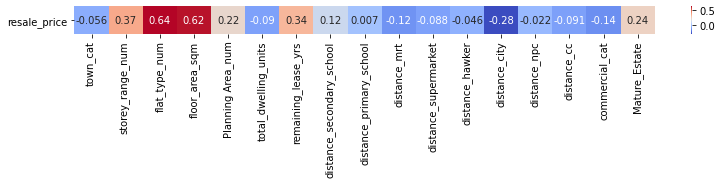

In [53]:
plt.subplots(figsize=(13,0.5))
sns.heatmap(test, xticklabels=test.columns, yticklabels=test.index, cmap='coolwarm', annot=True)
plt.yticks(rotation = 'horizontal')

In [54]:
flat_type = merged.groupby(by = ['flat_type','flat_type_num'])['resale_price'].mean().reset_index()


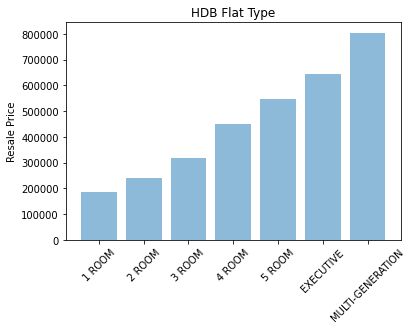

In [55]:
plt.bar(flat_type['flat_type'], flat_type['resale_price'], align='center', alpha=0.5)
plt.xticks(rotation=45)
plt.ylabel('Resale Price')
plt.title('HDB Flat Type')
plt.show()

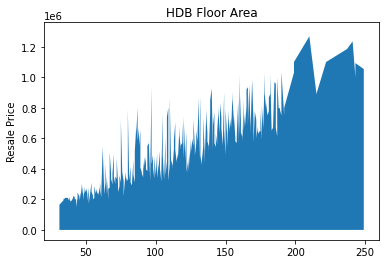

In [56]:
floor_area = merged.sort_values(by=['floor_area_sqm'])
plt.fill_between(floor_area['floor_area_sqm'], floor_area['resale_price'], lw=2)
plt.ylabel('Resale Price')
plt.title('HDB Floor Area')
plt.show()

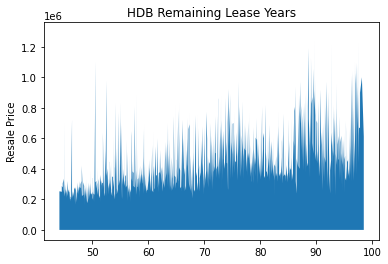

In [57]:
remaining = merged.sort_values(by=['remaining_lease_yrs'])
plt.fill_between(remaining['remaining_lease_yrs'], remaining['resale_price'], lw=2)
plt.ylabel('Resale Price')
plt.title('HDB Remaining Lease Years')
plt.show()

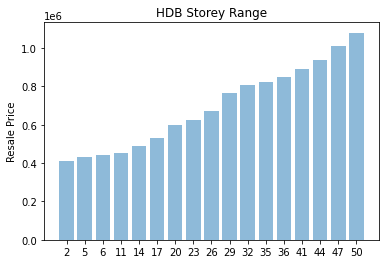

In [74]:
"""storey = merged.groupby(by = ['storey_range_num'])['resale_price'].mean().reset_index()
plt.bar(storey['storey_range_num'], storey['resale_price'], align='center', alpha=0.5)
plt.xticks(rotation=45)
plt.ylabel('Resale Price')
plt.title('HDB Storey Range')
plt.show()
"""

storey = merged.groupby(by = ['storey_range_num'])['resale_price'].mean().reset_index()
y_pos = np.arange(len(storey))
plt.bar(y_pos, storey['resale_price'], align='center', alpha=0.5)
plt.ylabel('Resale Price')
plt.xticks(y_pos, (storey['storey_range_num'].astype(int).astype(str)))
plt.title('HDB Storey Range')
plt.show()

In [58]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor

np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, resale_p, test_size=.3, random_state=0)
Models = ["OLS", "AdaBoost", "Decision Tree"]
MSE_lst = []

# OLS: 
regr = linear_model.LinearRegression() # Create linear regression object
np.random.seed(100)
regr.fit(X_train, y_train) # Train the model using the training sets
y_pred_ols = regr.predict(X_test) # Make predictions using the testing set
MSE_ols = mean_squared_error(y_test, y_pred_ols) # performance statistic
MSE_lst.append(MSE_ols)

# Boosting
adaboosting = AdaBoostRegressor()
adaboosting.fit(X=X_train, y=y_train)
y_pred_boosting = adaboosting.predict(X=X_test)
MSE_adaboost = mean_squared_error(y_test, y_pred_boosting)
MSE_lst.append(MSE_adaboost)

# Bagging
bagging = BaggingRegressor(DecisionTreeRegressor())
bagging.fit(X=X_train, y=y_train)
y_pred_dt = bagging.predict(X=X_test)
MSE_bag = mean_squared_error(y_test, y_pred_dt)
MSE_lst.append(MSE_bag)


33548


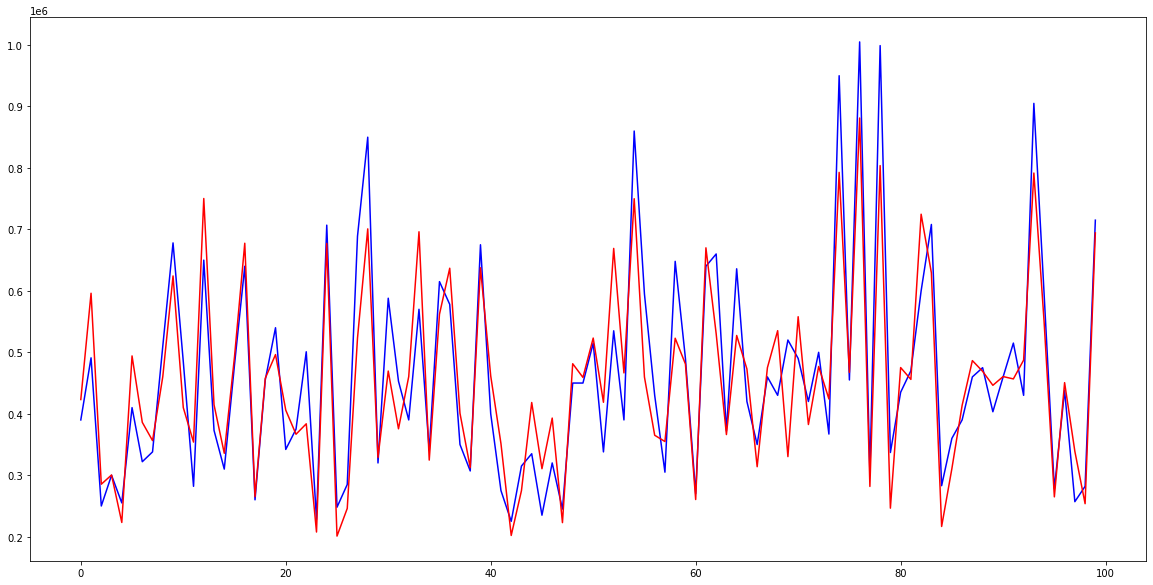

In [12]:
import matplotlib.pyplot as plt 
print(len(y_test))
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(range(len(y_test[:100])), y_test[:100], '-b',label='Actual')
ax.plot(range(len(y_pred_ols[:100])), y_pred_ols[:100], 'r', label='Predicted')
plt.show()

33548


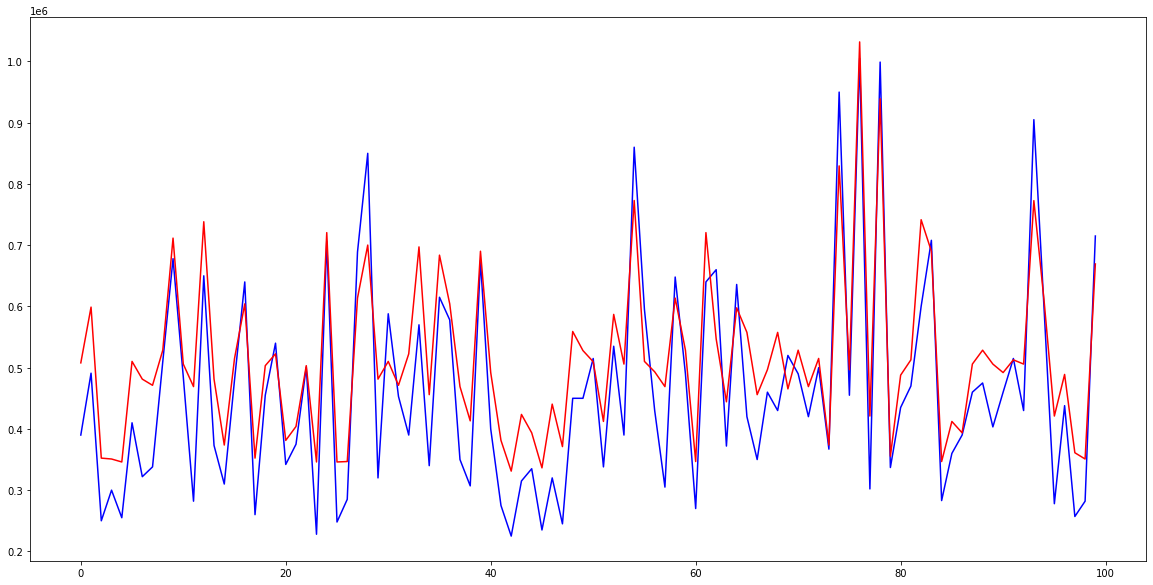

In [13]:
import matplotlib.pyplot as plt 
print(len(y_test))
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(range(len(y_test[:100])), y_test[:100], '-b',label='Actual')
ax.plot(range(len(y_pred_boosting[:100])), y_pred_boosting[:100], 'r', label='Predicted')
plt.show()

33548


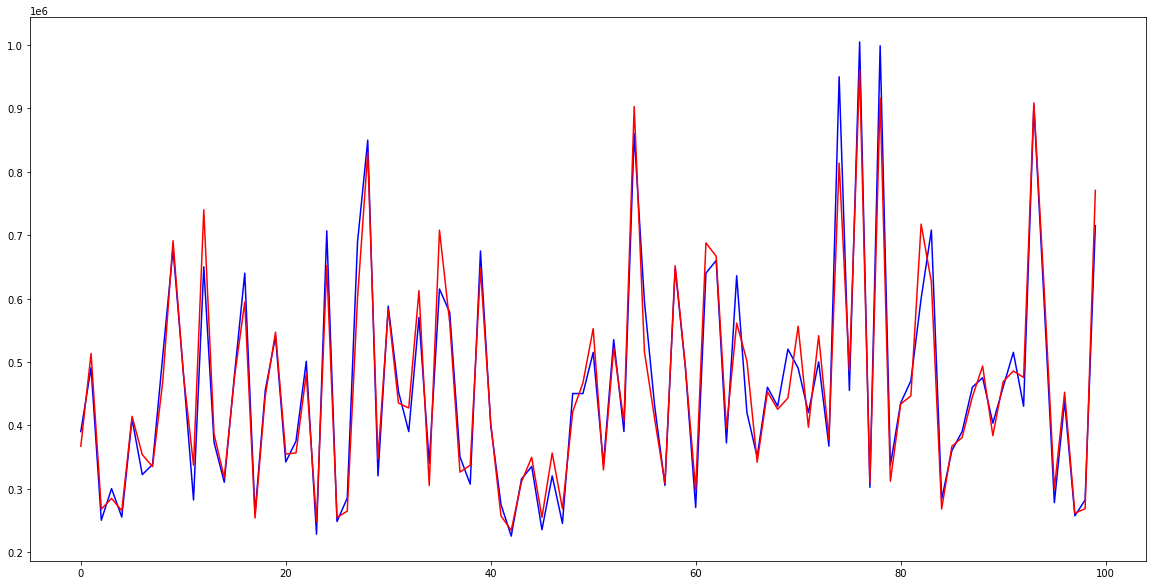

In [14]:
import matplotlib.pyplot as plt 
print(len(y_test))
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(range(len(y_test[:100])), y_test[:100], '-b',label='Actual')
ax.plot(range(len(y_pred_dt[:100])), y_pred_dt[:100], 'r', label='Predicted')
plt.show()

In [18]:
y_pred_df_ols = pd.DataFrame(y_pred_dt, columns= ['y_pred'])

print(len(y_pred_df_ols))
print(len(X_test))
pred_res1 = pd.concat([X_test,y_test], axis=1)
print(len(pred_res1))
pred_res1 = pred_res1.reset_index(drop=True)
pred_res2 = pd.concat([pred_res1,y_pred_df_ols], axis=1)
pred_res2.8

33548
33548
33548


,y_pred,resale_price
town_cat,,
0.0,416661.128354,418010.554401
1.0,418627.899124,419313.801208
2.0,644344.019829,645053.613670
3.0,394853.811682,395723.762118
4.0,573639.738714,575266.390909
5.0,442938.932269,443183.192996
6.0,731170.374214,727845.433962
7.0,654302.684644,653932.973783
8.0,415600.115229,415648.519348


In [19]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           resale_price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                 2.020e+04
Date:                Sat, 06 Nov 2021   Prob (F-statistic):               0.00
Time:                        04:11:48   Log-Likelihood:            -9.8603e+05
No. Observations:               78276   AIC:                         1.972e+06
Df Residuals:                   78260   BIC:                         1.972e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

c:\python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
